## Content
Column descriptions ID Customer ID Age Customer's age in completed years’ Experience #years of professional experience Income Annual income of the customer ($000) ZIP Code Home Address ZIP code. Family size of the customer CCAvg Avg. spending on credit cards per month ($000) Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional Mortgage Value of house mortgage if any. ($000) Personal Loan Did this customer accept the personal loan offered in the last campaign? Securities Account Does the customer have a securities account with the bank? CD Account Does the customer have a certificate of deposit (CD) account with the bank? Online Does the customer use internet banking facilities? Credit Card Does the customer uses a credit card issued by Universal Bank?


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn import metrics,preprocessing
from scipy import stats
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from collections import Counter
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
import cufflinks as cf
import graphviz,pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn import tree
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
%matplotlib inline

In [2]:
df=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [3]:
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
# Grouping the dataset by Age of the customers with their repective averages

In [5]:
df.groupby("Age").mean()

,ID,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,,,,,,,,,,,,,
23,2879.166667,-1.666667,67.250000,92785.583333,3.000000,2.511111,1.416667,71.916667,0.000000,0.166667,0.000000,0.666667,0.416667
24,2214.535714,-1.071429,74.214286,92876.107143,2.571429,2.028571,1.785714,19.714286,0.000000,0.142857,0.000000,0.642857,0.071429
25,2216.433962,-0.018868,66.981132,93445.660377,2.886792,1.796855,1.924528,60.018868,0.000000,0.113208,0.018868,0.528302,0.339623
26,2942.628205,0.961538,84.051282,93586.051282,2.692308,2.292735,1.923077,52.564103,0.166667,0.089744,0.051282,0.448718,0.230769
27,2507.516484,1.923077,80.802198,93218.461538,2.670330,1.744322,1.879121,83.219780,0.131868,0.153846,0.065934,0.571429,0.318681
28,2133.320388,2.961165,80.970874,93047.640777,2.592233,1.846117,1.757282,53.262136,0.087379,0.077670,0.038835,0.640777,0.271845
29,2409.967480,3.715447,81.056911,93226.178862,2.617886,1.939160,1.878049,61.008130,0.121951,0.024390,0.024390,0.569106,0.365854
30,2470.382353,4.860294,77.286765,92981.808824,2.507353,1.933211,1.867647,53.411765,0.125000,0.102941,0.051471,0.639706,0.264706
31,2549.240000,5.552000,70.824000,93573.248000,2.272000,1.953067,1.856000,60.752000,0.056000,0.072000,0.064000,0.624000,0.320000


In [6]:
df['Age'].mean()

45.3384

In [7]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [10]:
df.shape

(5000, 14)

In [11]:
# Let's see the type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


# Data Preparation

In [12]:
#dropping zipcode as it is not ncessary for model building
df=df.drop(['ZIP Code'],1)

C:\Users\USER\AppData\Local\Temp/ipykernel_8936/2166108535.py:2: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



In [13]:
df.head()

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1


# Checking for Outliers

In [14]:
# Checking for outliers in the continuous variables

df1=df[['Age','Experience','Income','CCAvg','Mortgage']]

In [15]:
df1.describe(percentiles=[.25, .50, .75, .90, .95, .99])

,Age,Experience,Income,CCAvg,Mortgage
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,45.338400,20.104600,73.774200,1.937913,56.498800
std,11.463166,11.467954,46.033729,1.747666,101.713802
min,23.000000,-3.000000,8.000000,0.000000,0.000000
25%,35.000000,10.000000,39.000000,0.700000,0.000000
50%,45.000000,20.000000,64.000000,1.500000,0.000000
75%,55.000000,30.000000,98.000000,2.500000,101.000000
90%,61.000000,36.000000,145.000000,4.300000,200.000000
95%,63.000000,38.000000,170.000000,6.000000,272.000000
99%,65.000000,41.000000,193.000000,8.000000,431.010000


From the distribution shown above, you can see that there no outliers in your data. The numbers are gradually increasing.

In [16]:
##Checking for Missing Values... Adding up the missing values (column-wise)

df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Exploratory Analysis

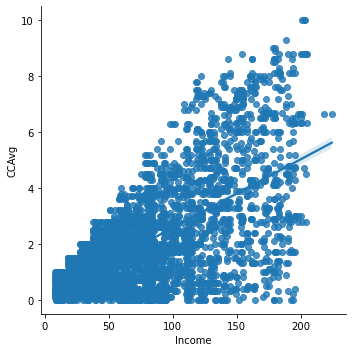

In [17]:
sns.lmplot(x='Income',y='CCAvg',data=df1);

the scatter plot above shows that the more your income,the more your Avg. spending on credit cards per month. thus there exist a postive relationship between Customer Income and their spending on credit cards. 

In [18]:
# Counting the various Ages of customers and ploting them to see their parttern

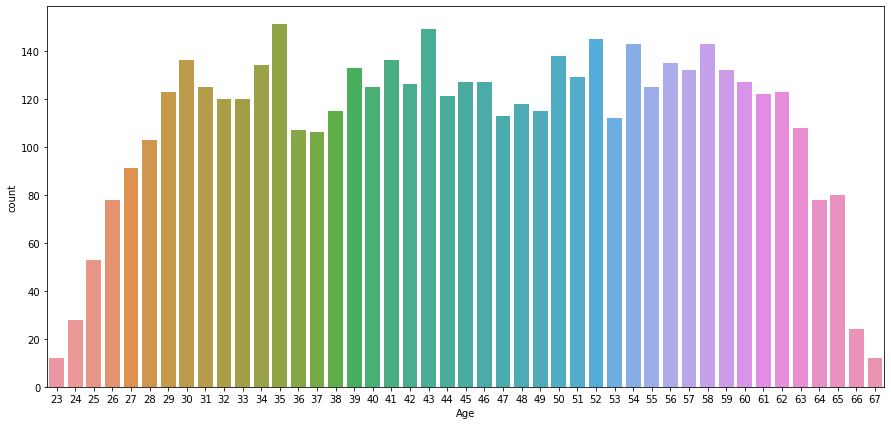

In [19]:
fig=plt.figure(figsize=(15,7))
sns.countplot(x='Age',data=df1);

In [20]:
df['Income'].mean()

73.7742

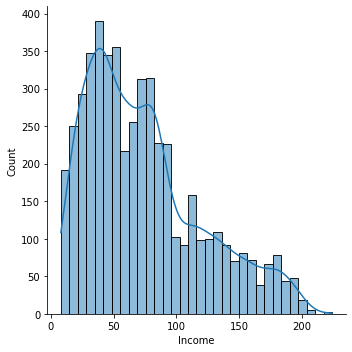

In [21]:
# fig=plt.figure(figsize=(50,40))
sns.displot(data=df1,x='Income' , kde=True);

In [22]:
# the distribution plot shows that most of the customers income is around 45. ths most of the custumers Income is
#below the mean.

In [23]:
# To check whether or not there is any missing values using seaborn

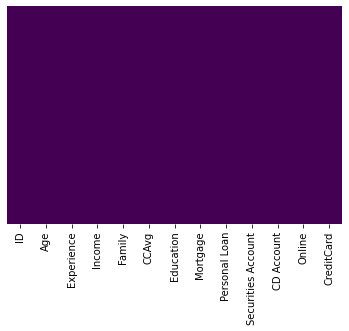

In [24]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis');

In [25]:
# it can be observed that there is no missing data in the dataset

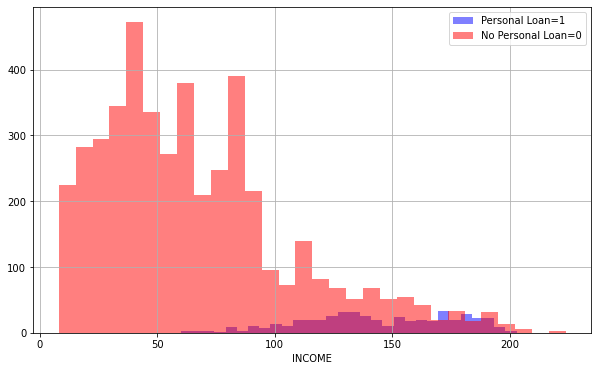

In [26]:
plt.figure(figsize=(10,6))
df[df['Personal Loan']==1]['Income'].hist(alpha=0.5,color='blue',
                                              bins=30,label='Personal Loan=1')
df[df['Personal Loan']==0]['Income'].hist(alpha=0.5,color='red',
                                              bins=30,label='No Personal Loan=0')
plt.legend()
plt.xlabel('INCOME');

In [95]:
# Meaning of the Color difference 

In [27]:
# visually most of the customers did not turn up for the loan

In [28]:
x= dict(Counter(df['Education']))
x

{1: 2096, 2: 1403, 3: 1501}

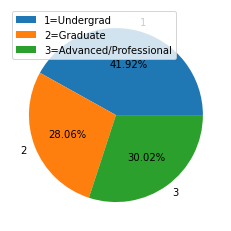

In [29]:
plt.pie(x.values(),labels=x.keys(),autopct='%1.2f%%')
plt.legend(labels=['1=Undergrad', '2=Graduate', '3=Advanced/Professional'] , loc="upper left")

The above shows that most of the banks customers are Undergraduates recording to about 41.92% followed by the advanced/ Professional amount to about 30.02% and the graduates, the least

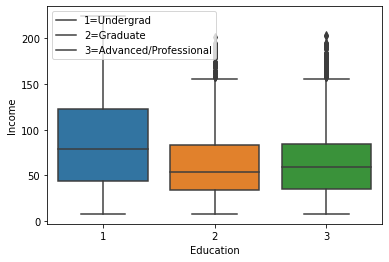

In [30]:
sns.boxplot(x="Education",y="Income",data=df)
plt.legend(labels=['1=Undergrad', '2=Graduate', '3=Advanced/Professional'] , loc="upper left")

In [31]:
IncEdu=df[['Education','Income']]
IncEdu

,Education,Income
0,1,49
1,1,34
2,1,11
3,2,100
4,2,45
...,...,...
4995,3,40
4996,1,15
4997,3,24
4998,2,49


In [32]:
# Heatmap of their repestive correlation

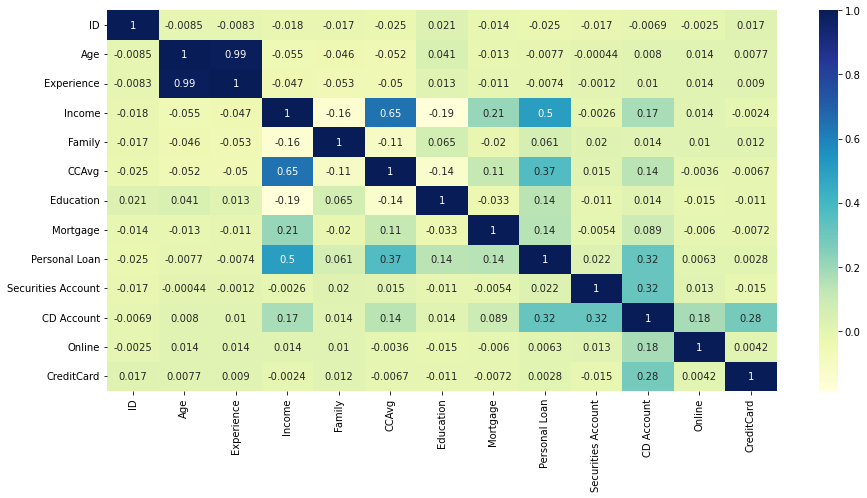

In [33]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),cmap='YlGnBu',annot=True);

In [34]:
# pairwise plot of the various colunms the determine their relationship with one another

In [35]:
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [96]:
dq=df.drop(columns=[ 'Securities Account', 'CD Account',
       'Online', 'CreditCard','Education','Family'],axis=1)

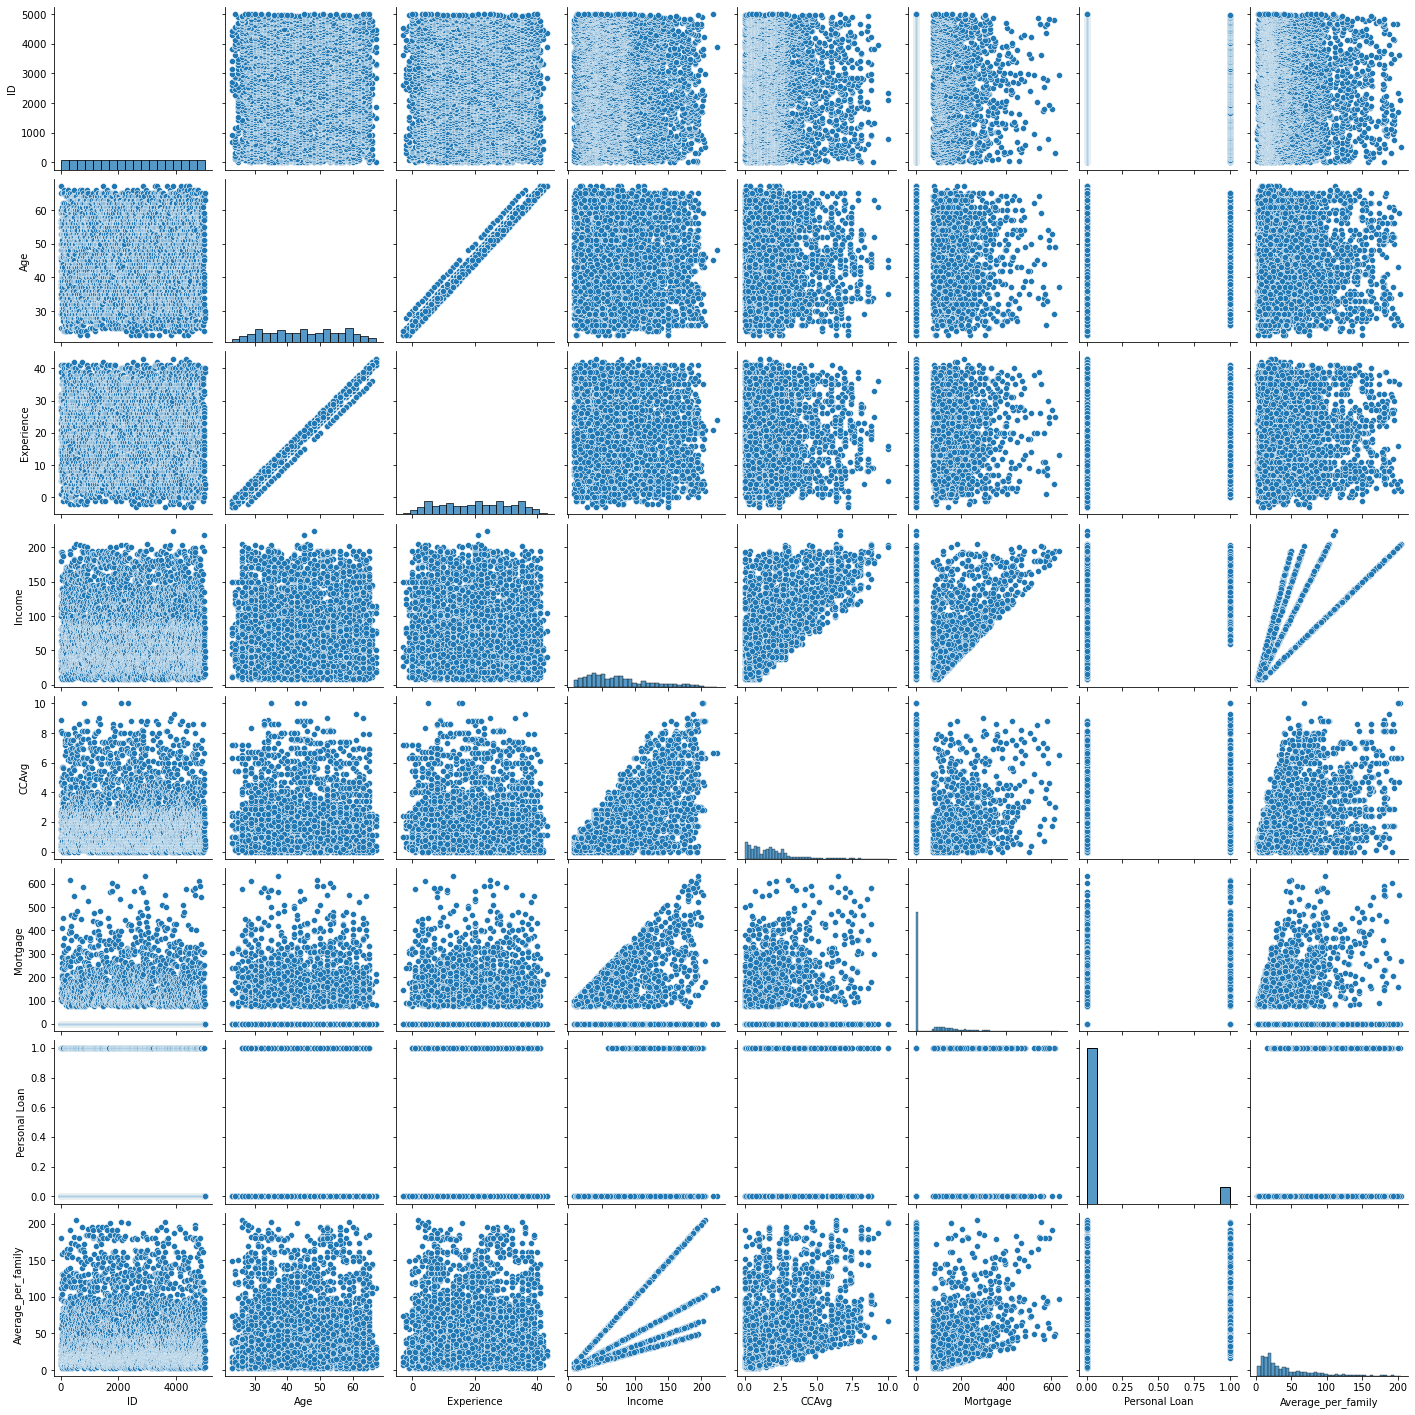

In [97]:
sns.pairplot(dq)

In [38]:
# It can be observed that the above data exhibits a characteristics of heteroscedasticity

In [39]:
init_notebook_mode(connected=True)

In [40]:
cf.go_offline()

In [41]:
IncEdu.iplot(kind='box')

## Identifying the number of unique characters in each columns

In [42]:
df.nunique()

ID                    5000
Age                     45
Experience              47
Income                 162
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

# Pre - train

In [43]:
# dropping Income Column

# To address the problem of Multicollinearity, we identify predetermined data with high correlation (assume high correlation  limit is 0.70000)

### Drop Age

In [44]:
df.corr()>0.700000

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,True,False,False,False,False,False,False,False,False,False,False,False,False
Age,False,True,True,False,False,False,False,False,False,False,False,False,False
Experience,False,True,True,False,False,False,False,False,False,False,False,False,False
Income,False,False,False,True,False,False,False,False,False,False,False,False,False
Family,False,False,False,False,True,False,False,False,False,False,False,False,False
CCAvg,False,False,False,False,False,True,False,False,False,False,False,False,False
Education,False,False,False,False,False,False,True,False,False,False,False,False,False
Mortgage,False,False,False,False,False,False,False,True,False,False,False,False,False
Personal Loan,False,False,False,False,False,False,False,False,True,False,False,False,False
Securities Account,False,False,False,False,False,False,False,False,False,True,False,False,False


#### NB: Multicollinearity is a condition where two or more independent variables in a regression model are highly correlated with each other

In [45]:
# Droping other variables not relevate to my work

In [46]:
df.columns


Index(['ID', 'Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

In [47]:
df['Average_per_family']=df['Income']/df['Family']

## Adding average spending of each family members

In [48]:
df

,ID,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Average_per_family
0,1,25,1,49,4,1.6,1,0,0,1,0,0,0,12.250000
1,2,45,19,34,3,1.5,1,0,0,1,0,0,0,11.333333
2,3,39,15,11,1,1.0,1,0,0,0,0,0,0,11.000000
3,4,35,9,100,1,2.7,2,0,0,0,0,0,0,100.000000
4,5,35,8,45,4,1.0,2,0,0,0,0,0,1,11.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,1,1.9,3,0,0,0,0,1,0,40.000000
4996,4997,30,4,15,4,0.4,1,85,0,0,0,1,0,3.750000
4997,4998,63,39,24,2,0.3,3,0,0,0,0,0,0,12.000000
4998,4999,65,40,49,3,0.5,2,0,0,0,0,1,0,16.333333


In [49]:
# df['Mortgage'].mean()

In [50]:
# df['Mortgage'] = df['Mortgage'].replace(0, 56.4988)

In [51]:
# df['Mortgage'].fillna(df['Mortgage'].mean(),inplace=True)


In [52]:
drop_Age=df.drop(columns=['ID','Age','Personal Loan','Family','Securities Account','Income','CreditCard', 'CD Account', 'Online'],axis=1)
drop_Age

,Experience,CCAvg,Education,Mortgage,Average_per_family
0,1,1.6,1,0,12.250000
1,19,1.5,1,0,11.333333
2,15,1.0,1,0,11.000000
3,9,2.7,2,0,100.000000
4,8,1.0,2,0,11.250000
...,...,...,...,...,...
4995,3,1.9,3,0,40.000000
4996,4,0.4,1,85,3.750000
4997,39,0.3,3,0,12.000000
4998,40,0.5,2,0,16.333333


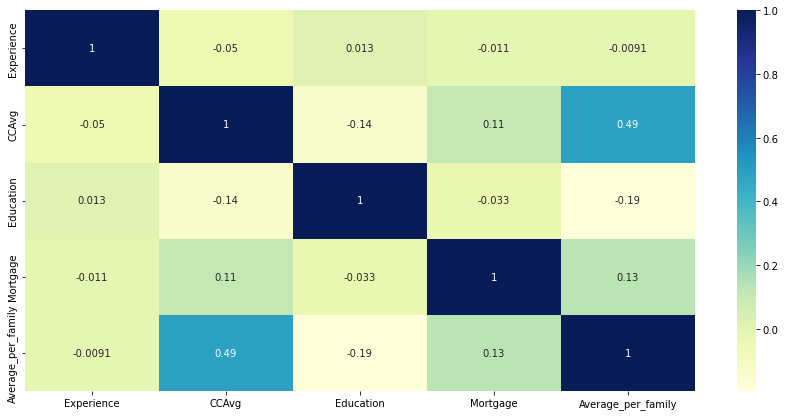

In [53]:
fig=plt.figure(figsize=(15,7))
sns.heatmap(drop_Age.corr(),cmap='YlGnBu',annot=True);

# Training the Data

In [54]:
X=drop_Age
y=df['Income']

In [55]:
# drop_Age.

In [56]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Testing the Data

In [57]:
X_train_sm=sm.add_constant(X_train)

C:\Users\USER\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



In [58]:
Income=sm.OLS(y_train,X_train_sm).fit()

In [59]:
Income.params

const                 30.165908
Experience            -0.130635
CCAvg                  9.410850
Education             -1.128376
Mortgage               0.041567
Average_per_family     0.655634
dtype: float64

In [60]:
Income.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1513.
Date:                Sat, 22 Jul 2023   Prob (F-statistic):               0.00
Time:                        12:41:27   Log-Likelihood:                -16369.
No. Observations:                3500   AIC:                         3.275e+04
Df Residuals:                    3494   BIC:                         3.279e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 30.1659      1.552     19.431      0.000      27.122      33.210
Experience            -0.1306      0.038     -3.408      0.001      -0.206      -0.055
CCAvg                  9.4108      0.291     32.344      0.000       8.840       9.981
Education             -1.1284      0.538     -2.099      0.036      -2.183      -0.074
Mortgage               0.0416      0.004      9.380      0.000       0.033       0.050
Average_per_family     0.6556      0.013     50.924      0.000       0.630       0.681
==============================================================================
Omnibus:                      558.300   Durbin-Watson:                   1.957
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              985.605
Skew:                           1.022   Prob(JB):                    9.52e-215
Kurtosis:                       4.606   Cond. No.                         431.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

An indicator of how well a statistical model fits the data is the log-likelihood. It is, specifically, the natural logarithm of the likelihood function, which, given the model's parameters, is the probability of witnessing the supplied data.
Since the likelihood function assessed at its maximum is likely to be a high number (since the logarithm of a number between 0 and 1 is negative), a log-likelihood of -16566 in your example indicates that the model fits the data reasonably well.

In [61]:
prediction=Income.predict()
prediction

array([157.53887652,  73.06834091,  51.62331994, ...,  48.10024021,
        55.76968244,  75.81033116])

Text(0, 0.5, 'Predicted values')

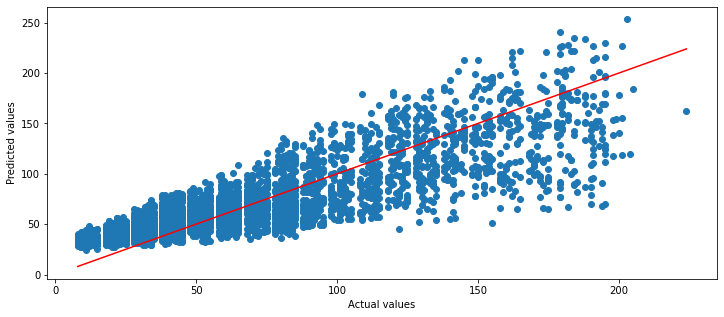

In [62]:
fig=plt.figure(figsize=(12,5))
plt.scatter(y_train,prediction )
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], 'r')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [63]:
lm=LinearRegression()
lm

LinearRegression()

In [64]:
lm.fit(X_train,y_train)

LinearRegression()

In [65]:
lm.coef_

array([-0.13063478,  9.41084979, -1.12837625,  0.04156686,  0.65563388])

In [66]:
lm.fit_intercept

True


# to predict the customers who turn up for the loan, the following algorithms are used

# Decision Tree

In [72]:
dt=df.drop(columns=['ID','Age','Personal Loan','Family','Securities Account','CreditCard',  'Online'],axis=1)
dt

,Experience,Income,CCAvg,Education,Mortgage,CD Account,Average_per_family
0,1,49,1.6,1,0,0,12.250000
1,19,34,1.5,1,0,0,11.333333
2,15,11,1.0,1,0,0,11.000000
3,9,100,2.7,2,0,0,100.000000
4,8,45,1.0,2,0,0,11.250000
...,...,...,...,...,...,...,...
4995,3,40,1.9,3,0,0,40.000000
4996,4,15,0.4,1,85,0,3.750000
4997,39,24,0.3,3,0,0,12.000000
4998,40,49,0.5,2,0,0,16.333333


In [73]:
dt.columns

Index(['Experience', 'Income', 'CCAvg', 'Education', 'Mortgage', 'CD Account',
       'Average_per_family'],
      dtype='object')

In [74]:
X=dt
y=df['Personal Loan']

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [76]:
dtree = tree.DecisionTreeClassifier()
dtree

DecisionTreeClassifier()

In [77]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [78]:
predictions=dtree.predict(dt)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

In [80]:
predictions = dtree.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
print('decision tree:',classification_report(y_test,predictions))

decision tree:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1478
           1       0.95      0.90      0.92       172

    accuracy                           0.98      1650
   macro avg       0.97      0.95      0.96      1650
weighted avg       0.98      0.98      0.98      1650



In [82]:
print("The Accuracy is:",metrics.accuracy_score(y_test,predictions)*100)

The Accuracy is: 98.42424242424242


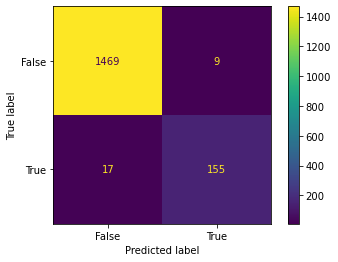

In [83]:
confusion_matrix = metrics.confusion_matrix(y_test,predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

# Random Forest

In [84]:
rfc = RandomForestClassifier(n_estimators=1000)

In [85]:
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=1000)

## Predictions and Evaluation

In [86]:
predictions = rfc.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1478
           1       0.99      0.86      0.92       172

    accuracy                           0.98      1650
   macro avg       0.99      0.93      0.96      1650
weighted avg       0.98      0.98      0.98      1650



In [88]:
print("The Accuracy is:",metrics.accuracy_score(y_test,predictions)*100)

The Accuracy is: 98.42424242424242


In [89]:
dcal = list(df.columns[1:])
dcal

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'Securities Account',
 'CD Account',
 'Online',
 'CreditCard',
 'Average_per_family']

In [90]:
dot_data= tree.export_graphviz(dtree, out_file=None, 
                      feature_names=['Age', 'Experience', 'Family', 'CCAvg','CD Account', 'Education', 'Mortgage'],  
                      class_names=['0', '1'],  
                      filled=True, rounded=True,  
                      special_characters=True)


In [91]:
dot_data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;\nedge [fontname="helvetica"] ;\n0 [label=<Experience &le; 113.5<br/>gini = 0.167<br/>samples = 3350<br/>value = [3042, 308]<br/>class = 0>, fillcolor="#e88e4d"] ;\n1 [label=<Family &le; 2.95<br/>gini = 0.038<br/>samples = 2707<br/>value = [2655, 52]<br/>class = 0>, fillcolor="#e6833d"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label=<Experience &le; 106.5<br/>gini = 0.006<br/>samples = 2506<br/>value = [2499, 7]<br/>class = 0>, fillcolor="#e5813a"] ;\n1 -> 2 ;\n3 [label=<gini = 0.0<br/>samples = 2449<br/>value = [2449, 0]<br/>class = 0>, fillcolor="#e58139"] ;\n2 -> 3 ;\n4 [label=<Family &le; 0.85<br/>gini = 0.215<br/>samples = 57<br/>value = [50, 7]<br/>class = 0>, fillcolor="#e99355"] ;\n2 -> 4 ;\n5 [label=<Mortgage &le; 46.583<br/>gini = 0.426<br/>samples = 13<br/>value = [9, 4]<br/>class = 0>, fillcolor="#f1b991"] ;\n4 -> 5 ;\n6 [label=<gini = 0.0<br/>samples

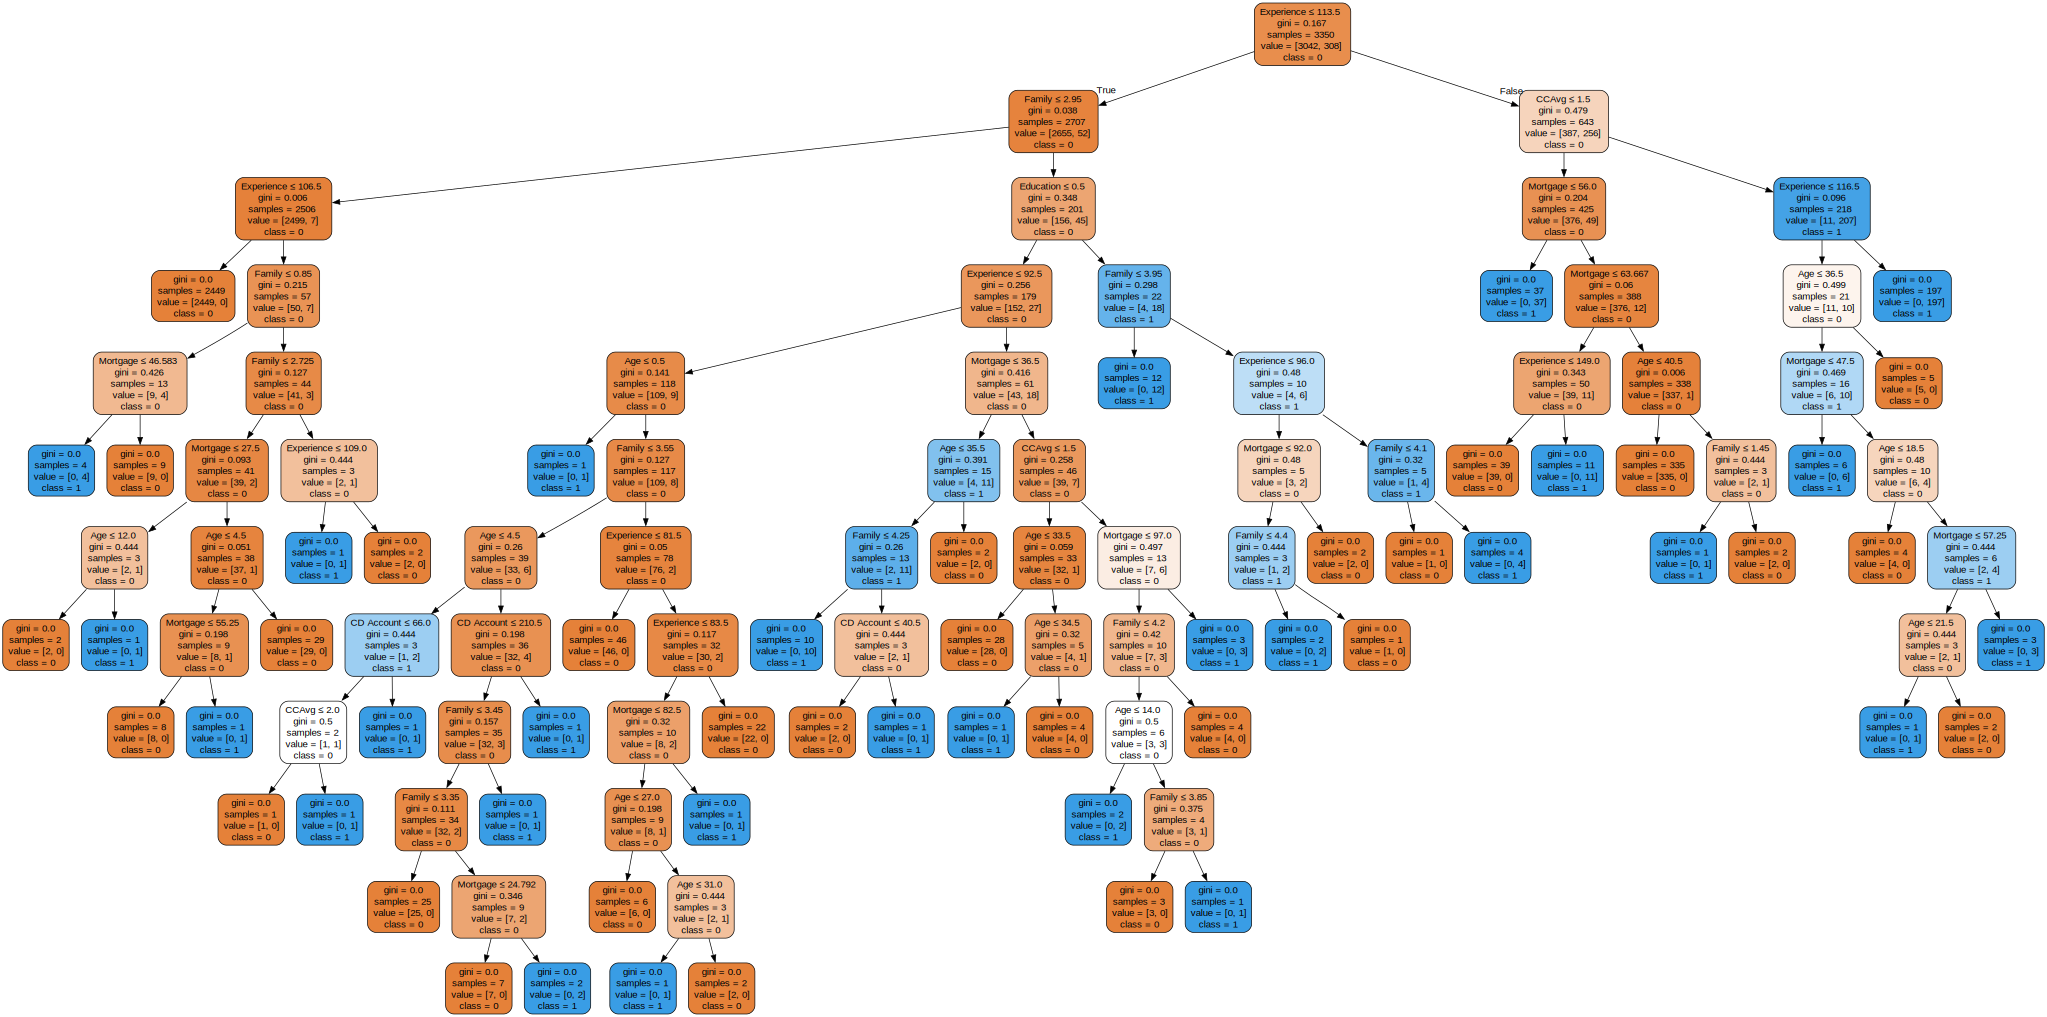

In [92]:
dot = graphviz.Source(dot_data)
dot

In [94]:
 dot.render("decision_tree")

'decision_tree.pdf'

Recommendation 
##### 1. focus on undergradutes (i.e student loan)
Decrease interest rate